In [101]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [103]:

df = pd.read_csv('/Users/vijayc/Downloads/US_Housing_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
sum(df.duplicated())

0

In [7]:
emptyCount_PerFeature = df.isna().sum()
emptyCountPercent_PerFeature = (emptyCount_PerFeature / len(df)) * 100
nonZero_emptyCountPercent_PerFeature = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 0]
rounded_Percent = np.round(nonZero_emptyCountPercent_PerFeature)
print(rounded_Percent)

LotFrontage      18.0
Alley            94.0
MasVnrType       60.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


In [9]:
# Drop columns that are with more than 59% of NaN values and call that as ddf
features_to_drop = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 59].index
df.drop(columns=features_to_drop, inplace=True)
df.shape

(1460, 76)

In [11]:
df.drop(columns=['Id'], inplace=True)
df.shape

(1460, 75)

In [13]:
emptyCount_PerFeature = df.isna().sum()
emptyCountPercent_PerFeature = (emptyCount_PerFeature / len(df)) * 100
nonZero_emptyCountPercent_PerFeature = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 0]
rounded_Percent = np.round(nonZero_emptyCountPercent_PerFeature)
print(rounded_Percent)

LotFrontage     18.0
MasVnrArea       1.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinType2     3.0
FireplaceQu     47.0
GarageType       6.0
GarageYrBlt      6.0
GarageFinish     6.0
GarageQual       6.0
GarageCond       6.0
dtype: float64


<Axes: >

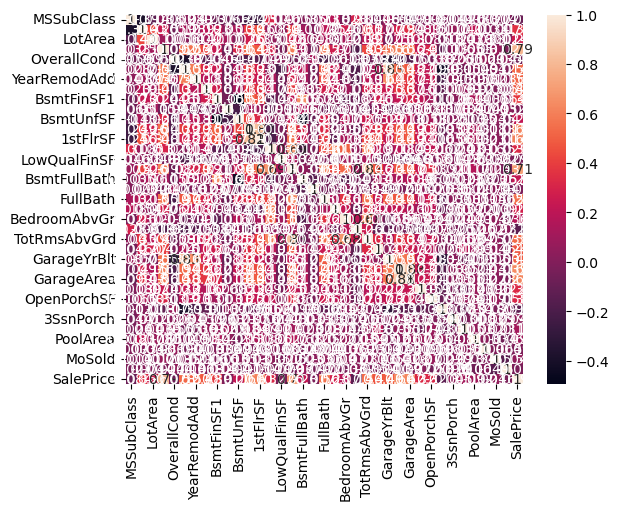

In [15]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

In [16]:
categorical_columns_ddf = df.select_dtypes(['object']).columns
for column in categorical_columns_ddf:
    print(f"Unique values in column {column}: {df[column].unique()}")
print(f"Total categorical column in dataset is: {len(categorical_columns_ddf)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column Street: ['Pave' 'Grvl']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column Utilities: ['AllPub' 'NoSeWa']
Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in column Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values

In [19]:
# Remove catorigical columns that has more than 5 unique values from ddf dataframe and call that as cdf
features_5_to_drop = [col for col in categorical_columns_ddf if df[col].nunique() > 5]
df.drop(columns=features_5_to_drop, inplace=True)
df.shape

(1460, 59)

In [21]:
categorical_columns_cdf = df.select_dtypes(['object']).columns
for column in categorical_columns_cdf:
    print(f"Unique values in column {column}: {df[column].unique()}")
print(f"Total categorical column in cdf dataset is: {len(categorical_columns_cdf)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column Street: ['Pave' 'Grvl']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column Utilities: ['AllPub' 'NoSeWa']
Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in column BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in column BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in column HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values in column CentralAir: ['Y' 'N']
Unique values in column Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Unique valu

In [23]:
# Applying Ordinal encoding techniques for some of the Caterogical data columns
# Unique values in column Street: ['Pave' 'Grvl']
Street_map = {"Grvl": 0, "Pave": 1}
df['Street'] = df['Street'].map(Street_map)

# Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LotShape_map = {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}
df['LotShape'] = df['LotShape'].map(LotShape_map)

# Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour_map = {"Low": 0, "Lvl": 1, "Bnk": 2, "HLS": 3}
df['LandContour'] = df['LandContour'].map(LandContour_map)

# Unique values in column Utilities: ['AllPub' 'NoSeWa']
Utilities_map = {"NoSeWa": 0, "AllPub": 1}
df['Utilities'] = df['Utilities'].map(Utilities_map)

# Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig_map = {"Inside": 0, "FR2": 1, "FR3": 2, "Corner":3, "CulDSac":4}
df['LotConfig'] = df['LotConfig'].map(LotConfig_map)

In [25]:
#rdf['LotShape'].unique()
categorical_columns_after_encoding = df.select_dtypes(['object']).columns
for column in categorical_columns_after_encoding:
    print(f"Unique values in column {column}: {df[column].unique()}")
print(f"Total categorical column in cdf dataset after encoding is: {len(categorical_columns_after_encoding)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in column BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in column BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in column HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values in column CentralAir: ['Y' 'N']
Unique values in column Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Unique values in column KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values in column GarageFinish: ['RFn' 'Unf' 'Fin' nan]
Unique values in column GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values in column GarageCond: ['TA' 'Fa' nan 'Gd' 'P

In [27]:
numerical_columns_cdf = df.select_dtypes(['int64', 'float64']).columns
print(f"Total numerical column in cdf dataset is: {len(numerical_columns_cdf)}")

Total numerical column in cdf dataset is: 42


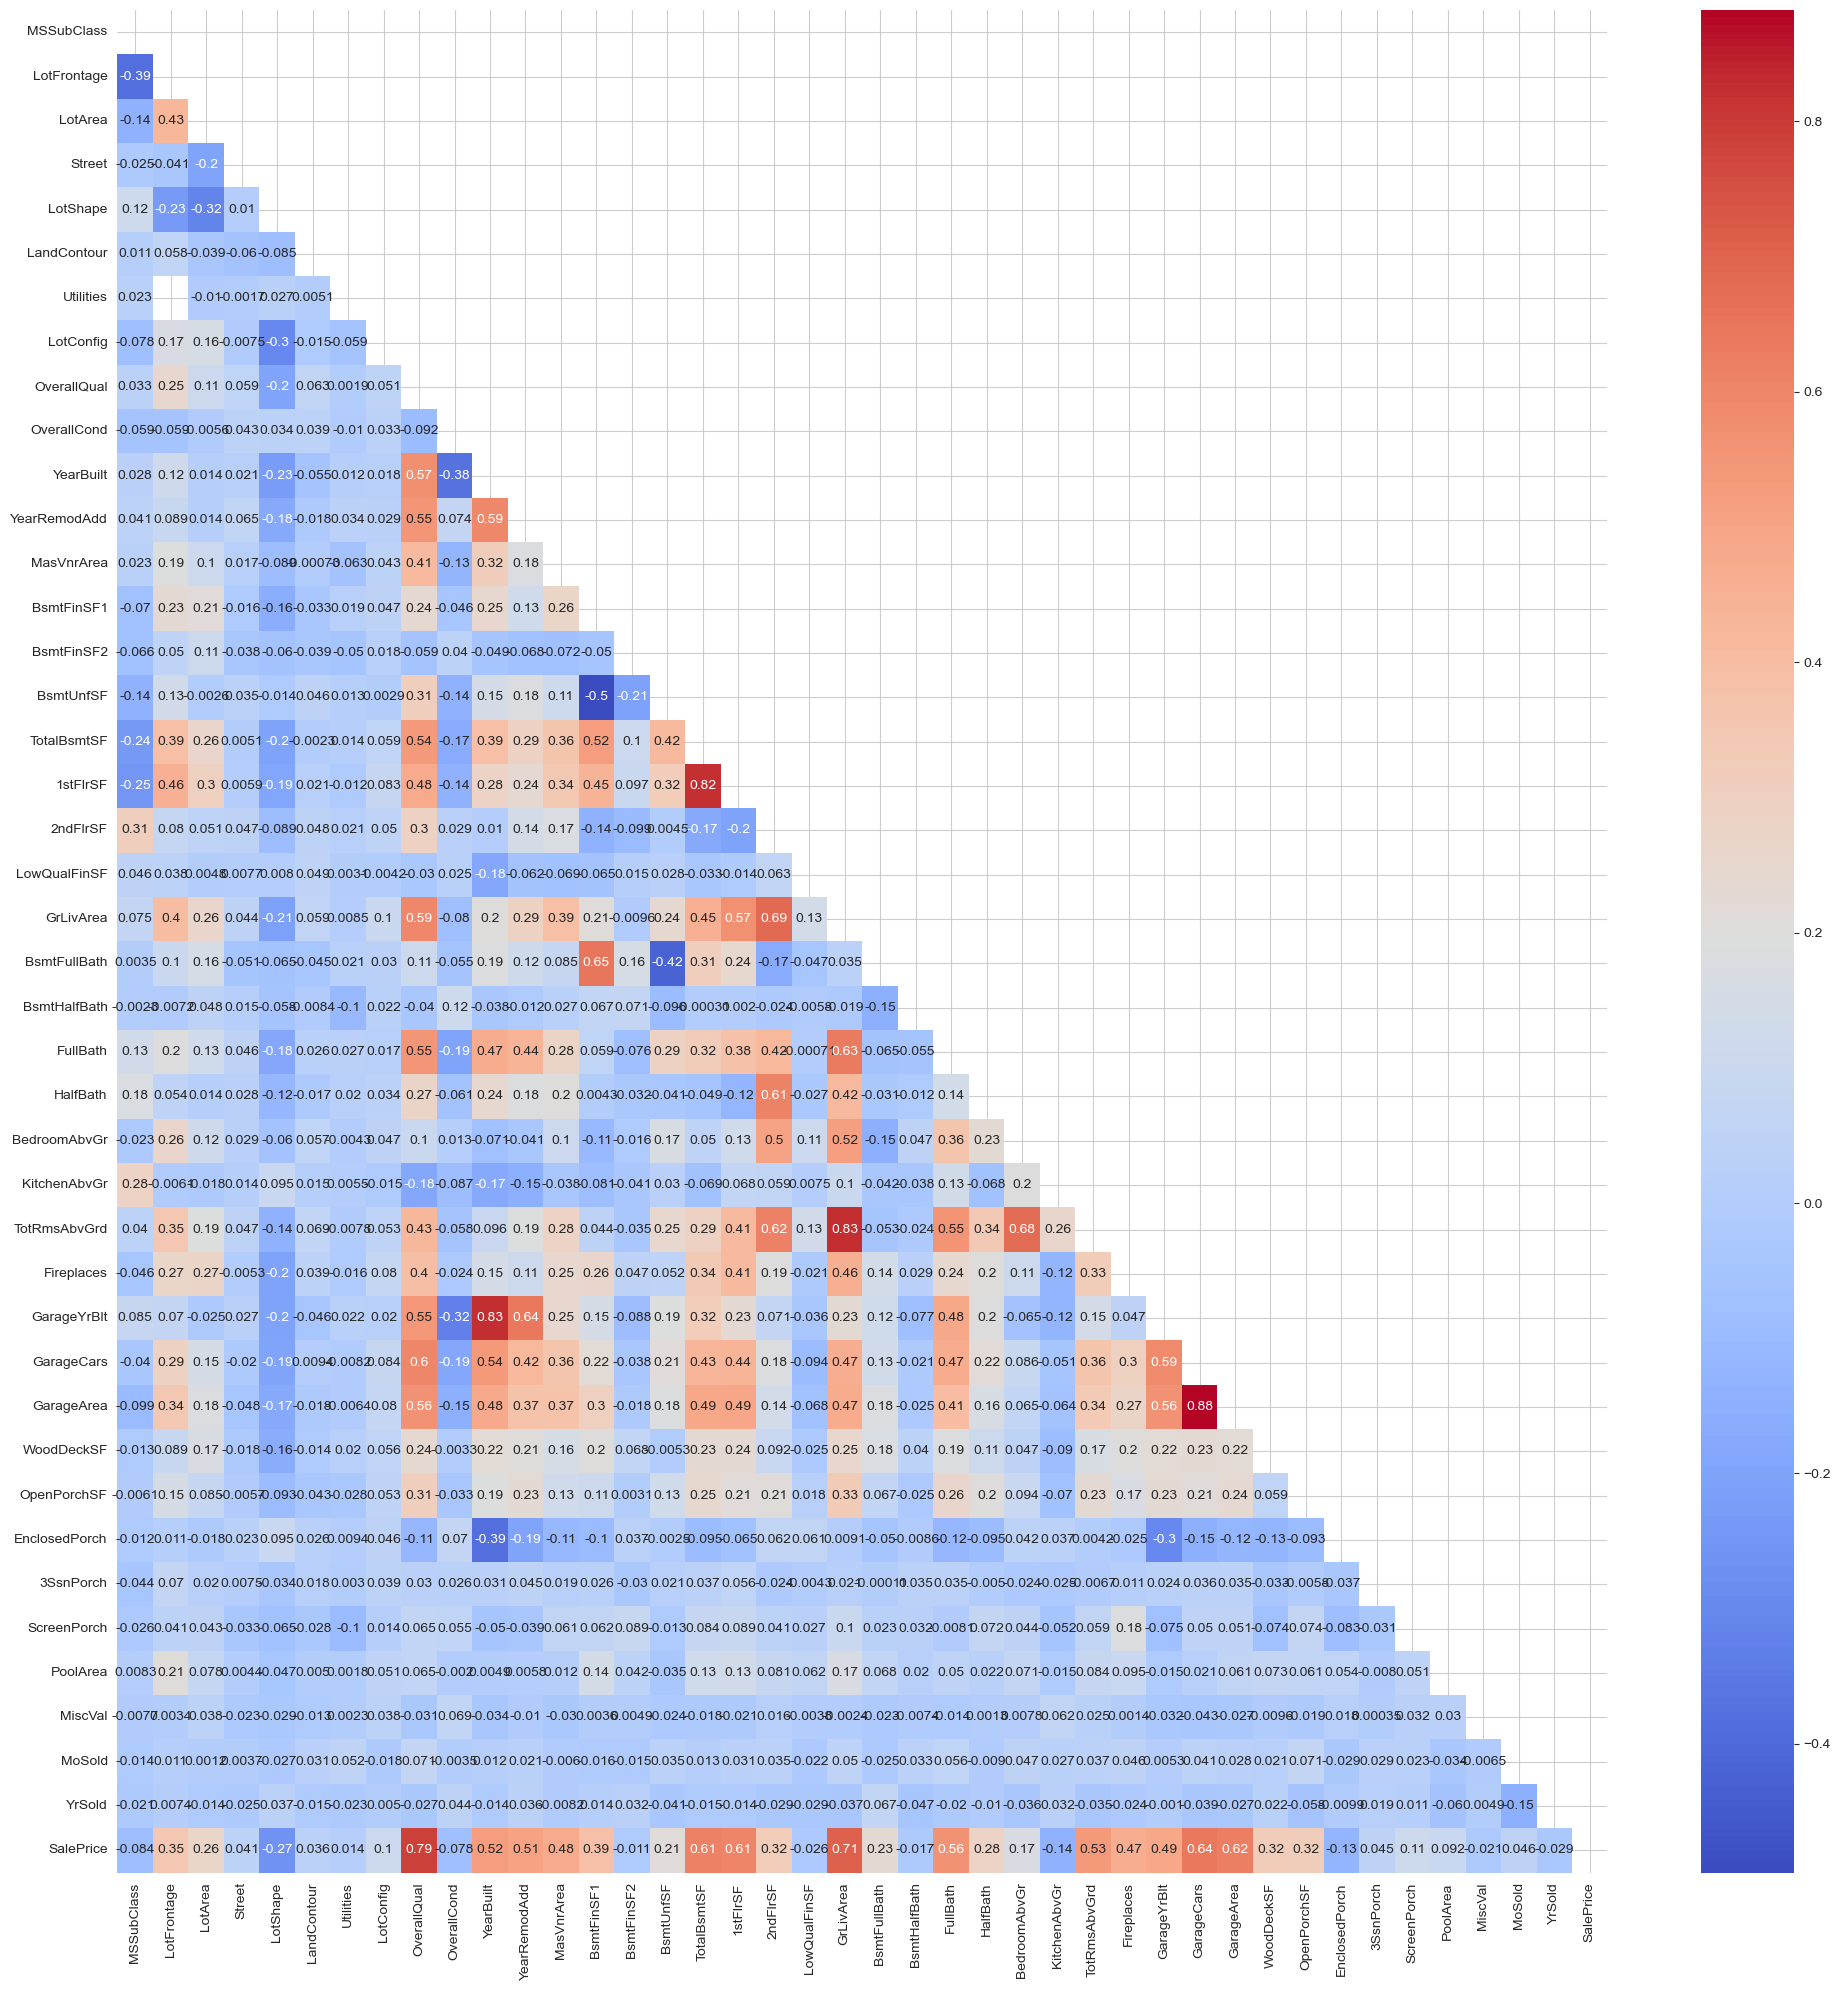

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = df[numerical_columns_cdf].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

In [30]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

df['FireplaceQu'] = df['FireplaceQu'].ffill()
df['GarageFinish'] = df['GarageFinish'].ffill()

df['GarageQual'] = df['GarageQual'].bfill()
df['GarageCond'] = df['GarageCond'].ffill()

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [31]:
#from sklearn.preprocessing import OrdinalEncoder
#ccdf = pd.DataFrame(OrdinalEncoder().fit_transform(df[categorical_columns_cdf]), columns=categorical_columns_cdf)

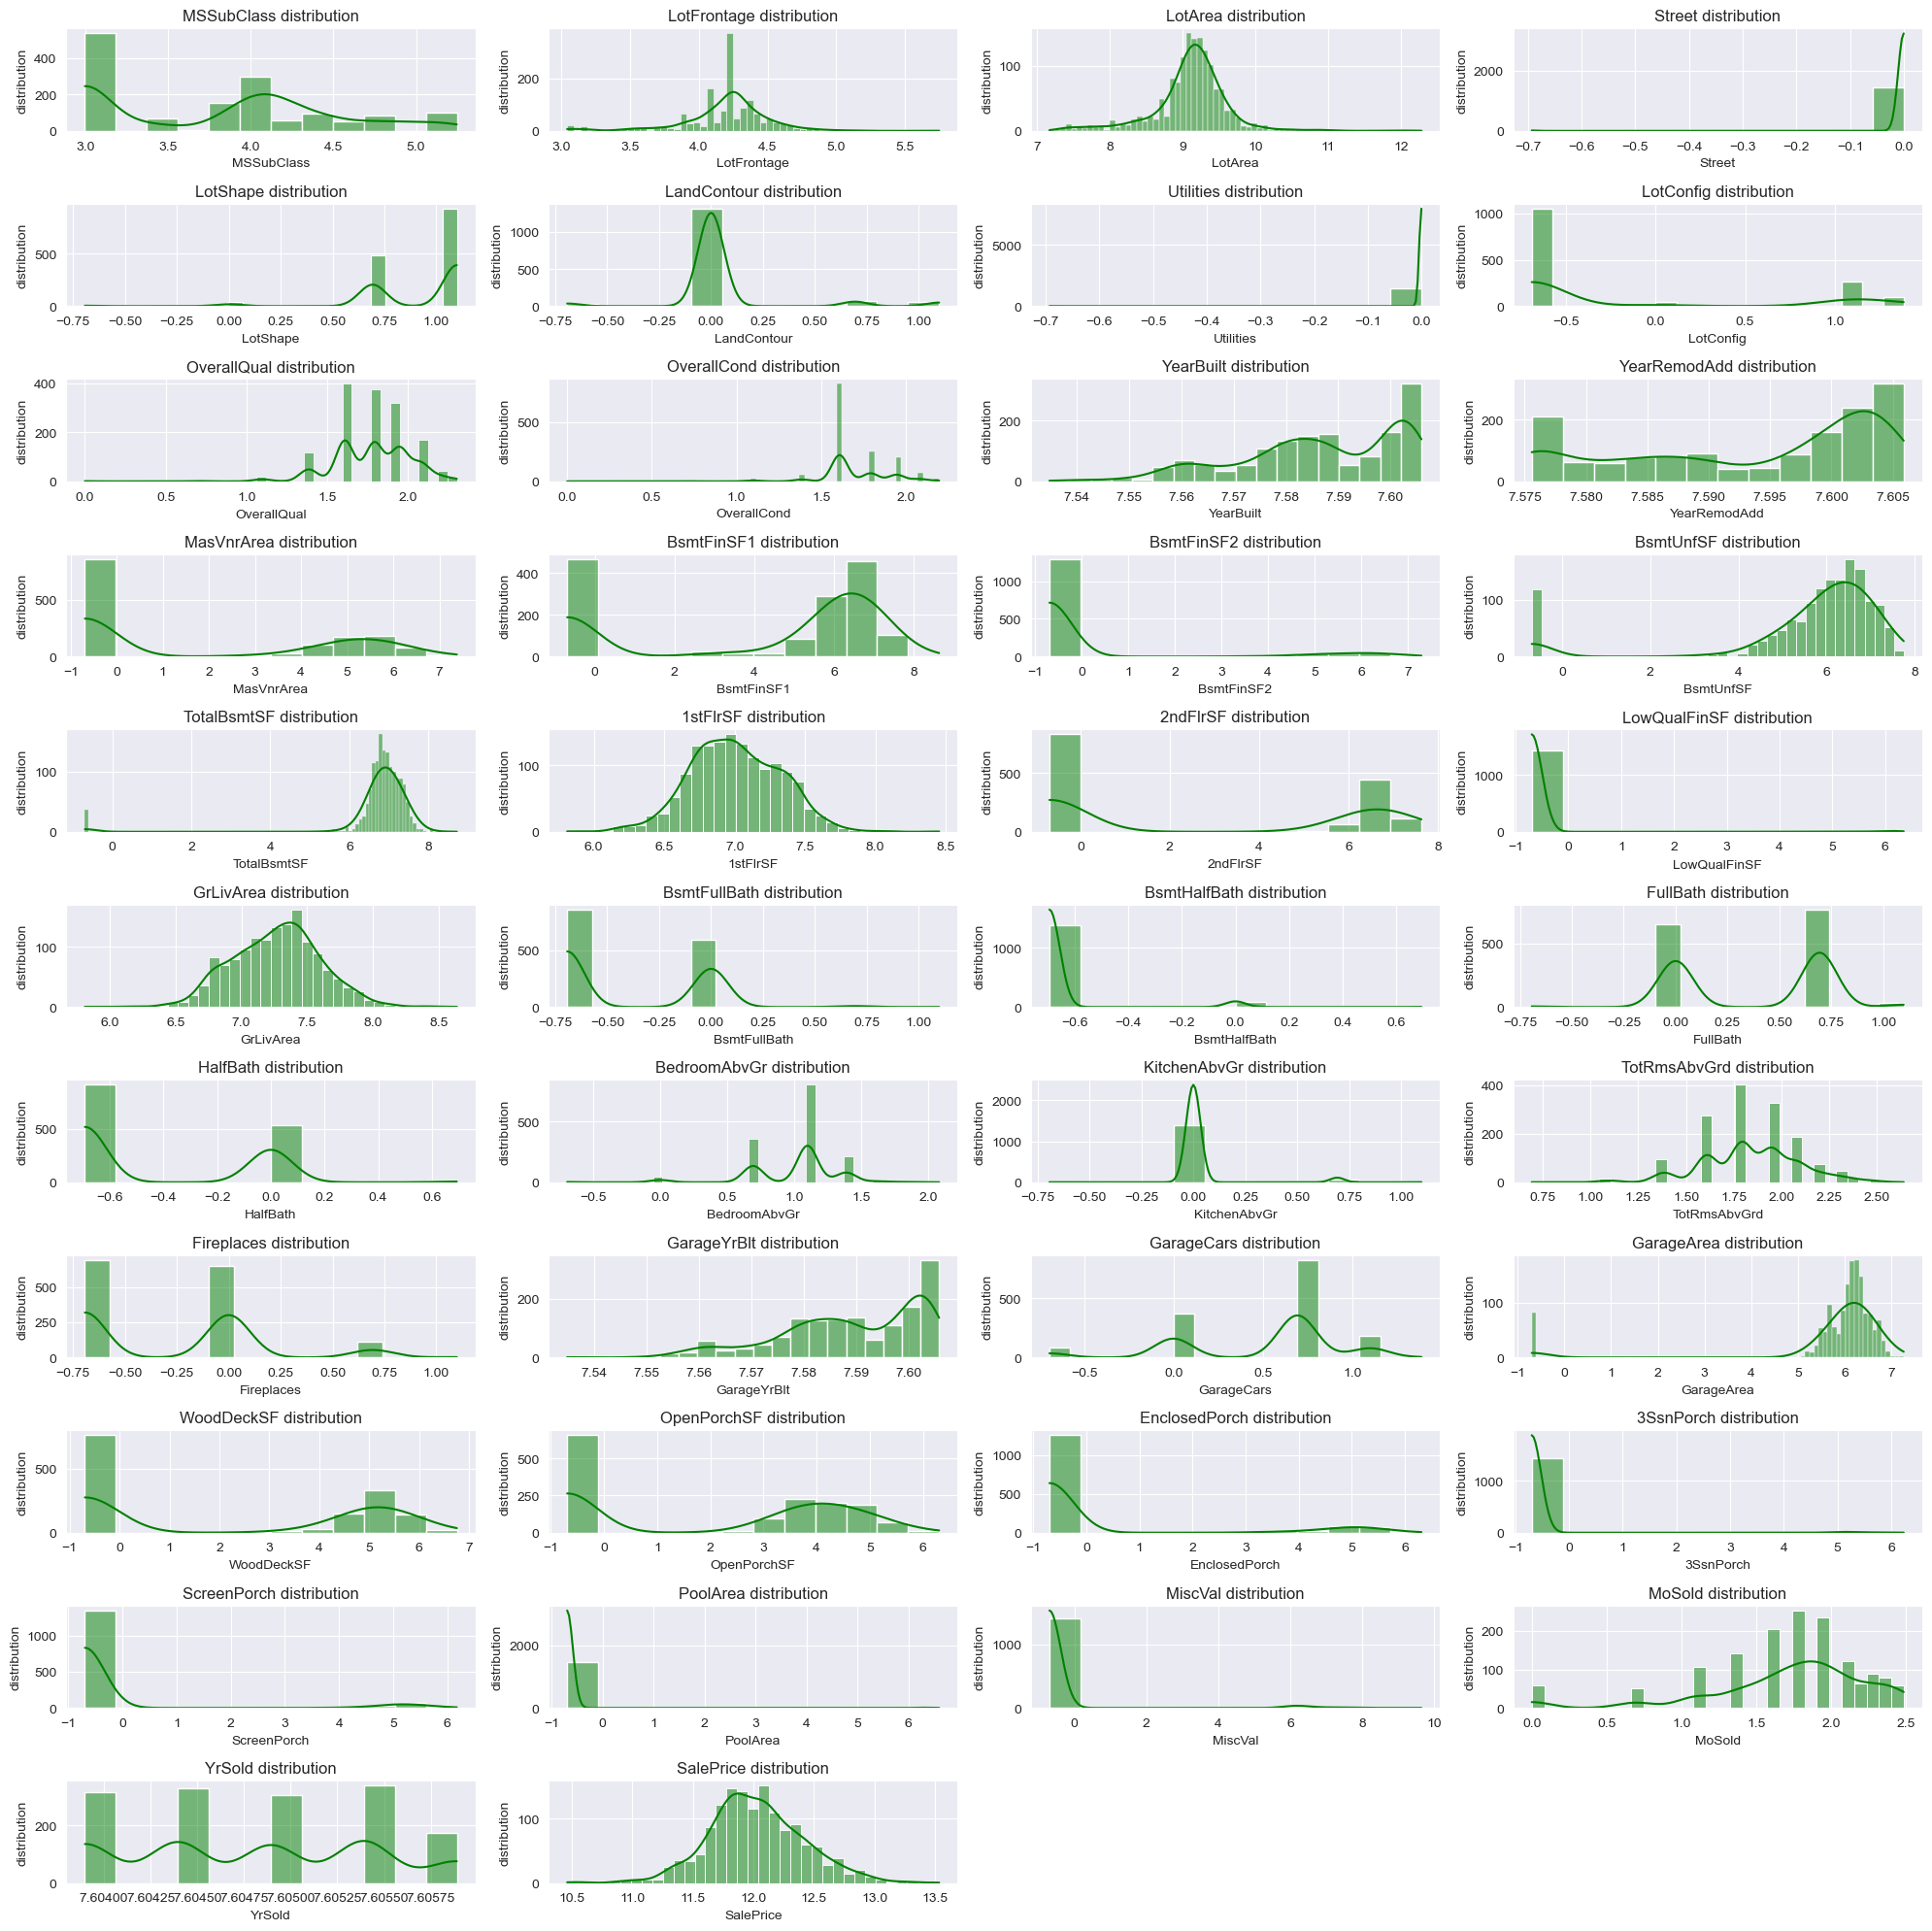

In [35]:
import math
sns.set_style('darkgrid')
numerical_columns_ccdf = df.select_dtypes(['int64', 'float64']).columns
np.seterr(divide='ignore', invalid='ignore')
total_plots = len(numerical_columns_ccdf)
rows = math.ceil(total_plots / 4)
cols = 4

plt.figure(figsize=(20,20))
for index, feature in enumerate(numerical_columns_ccdf):
    plt.subplot(rows, cols, index + 1)
    feature_data = np.where(df[feature] == 0, np.log(df[feature] + 0.5), np.log(df[feature]))
    # Plotting the histogram with KDE
    sns.histplot(feature_data, kde=True, color='g')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

In [37]:
df.describe()
df.shape

(1460, 59)

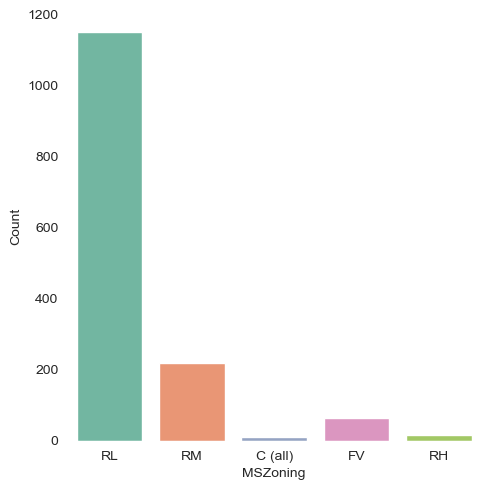

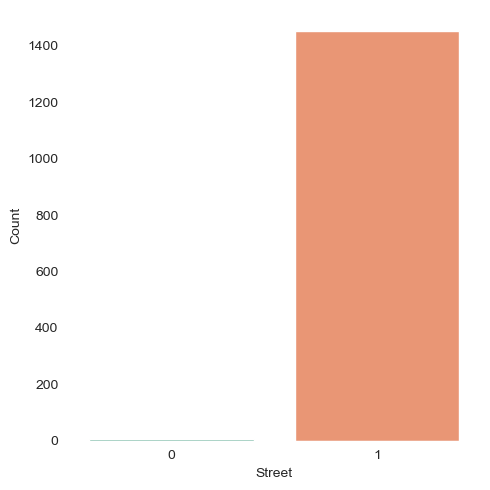

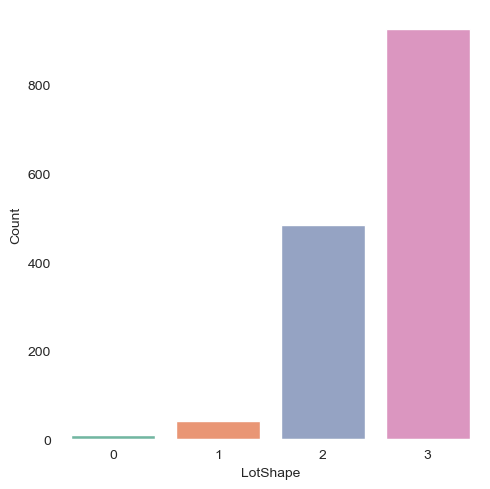

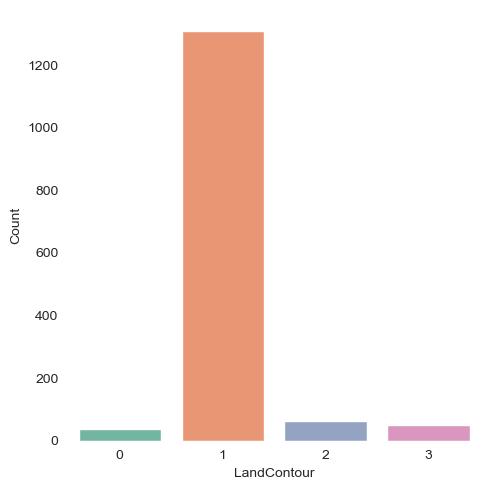

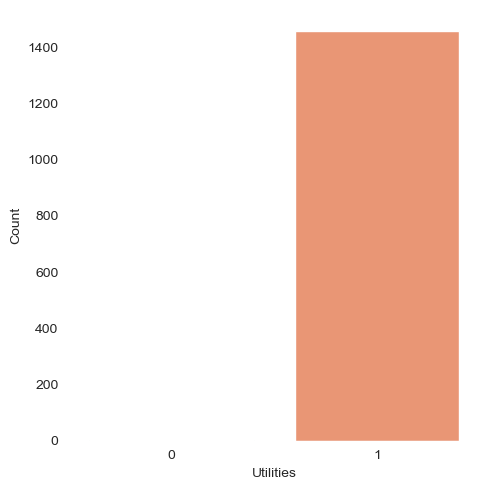

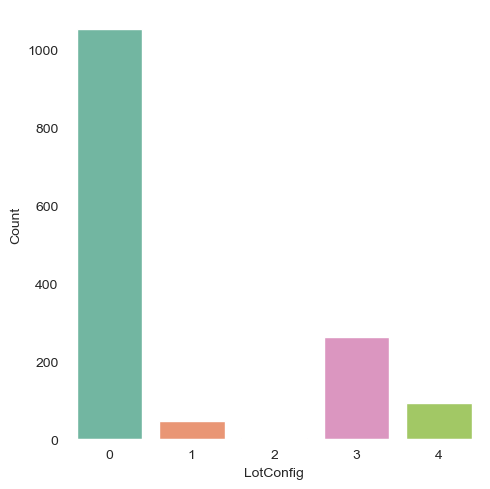

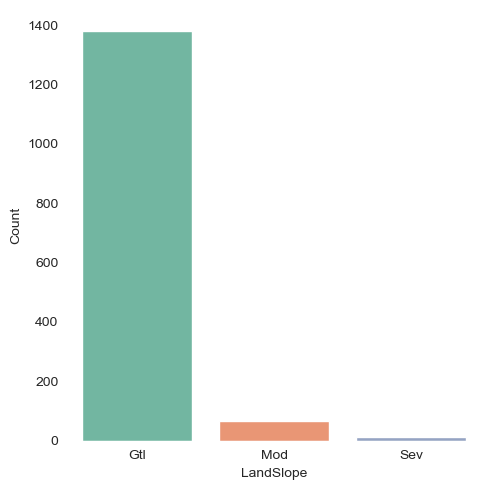

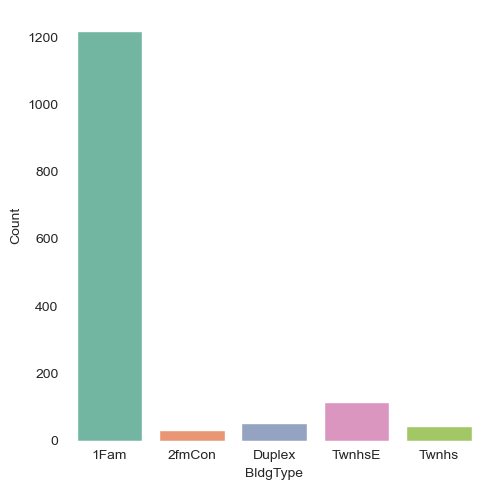

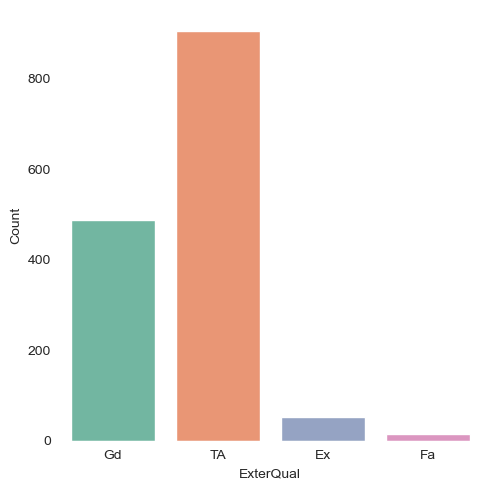

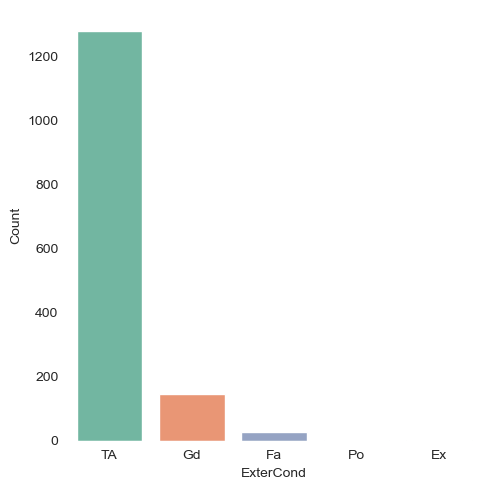

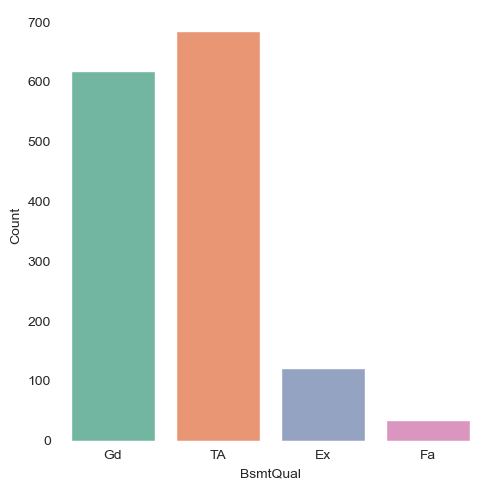

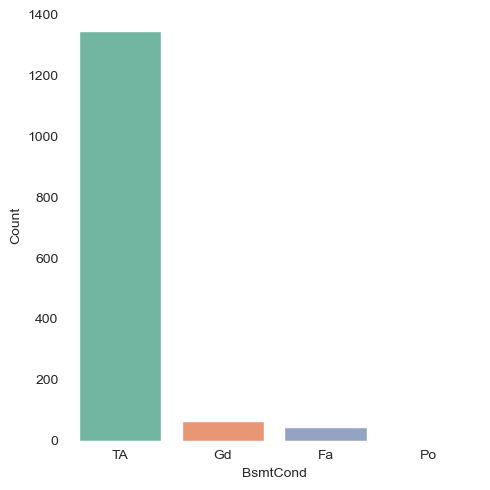

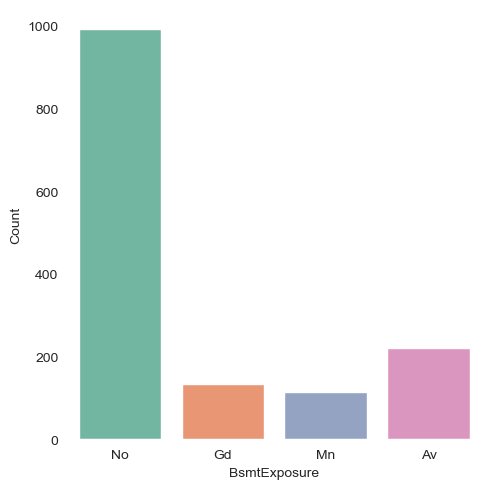

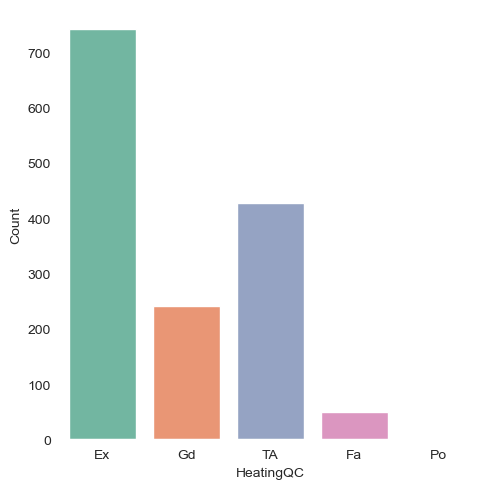

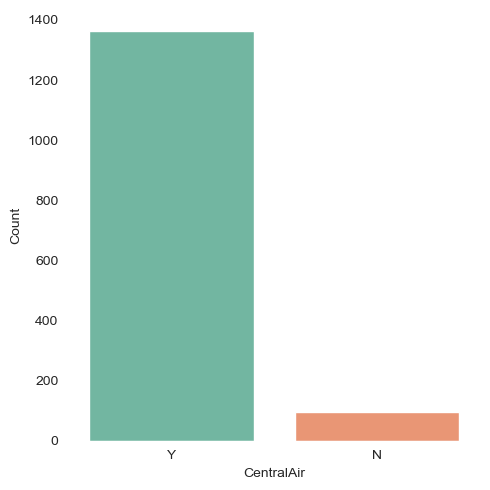

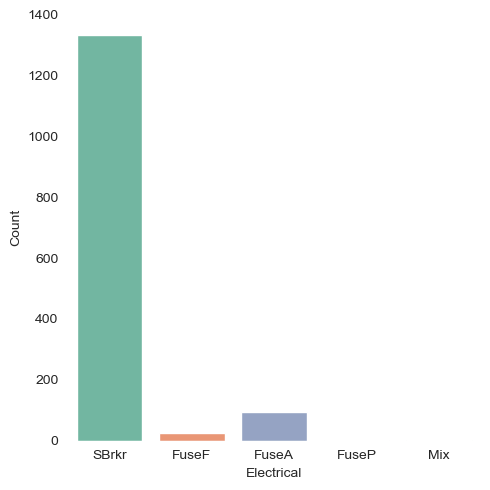

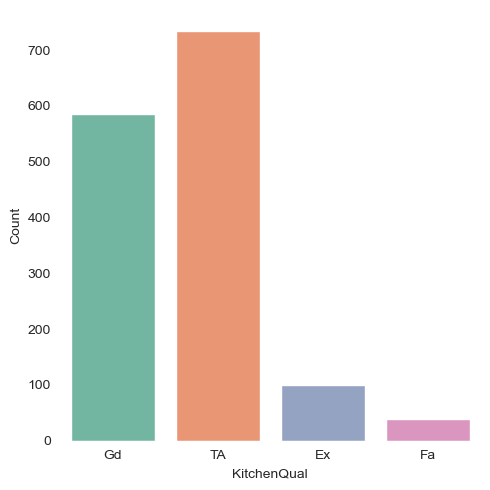

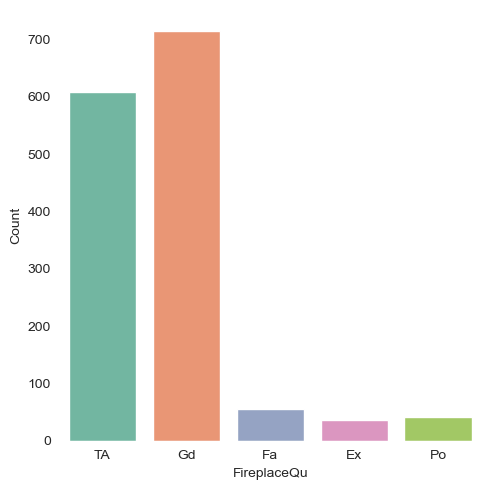

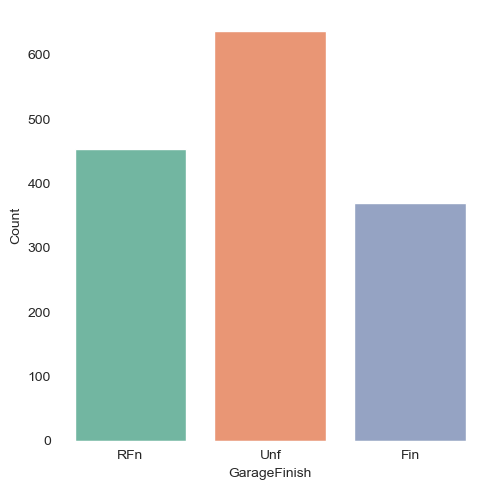

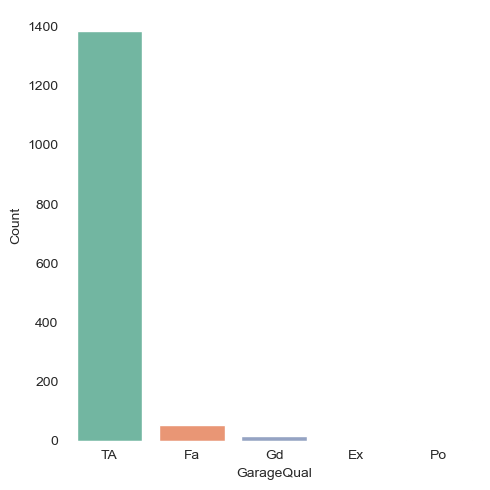

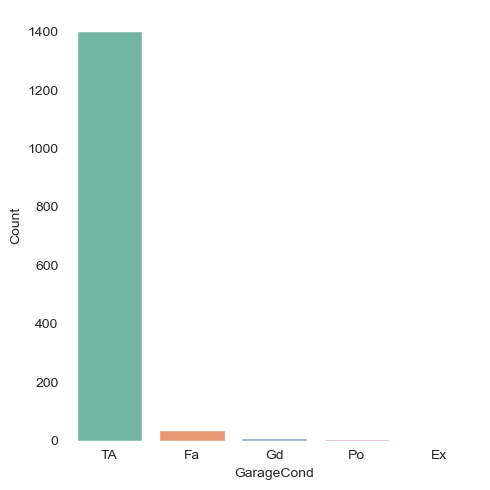

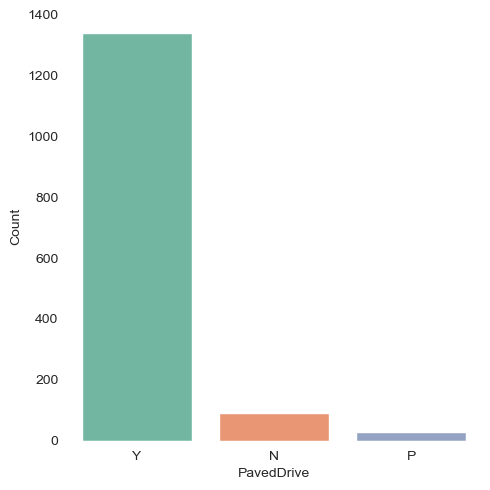

In [39]:
for feature in categorical_columns_cdf:
    f = sns.catplot(data=df, x=feature, kind ='count', palette='Set2', hue=feature, legend=False)
    #f.fig.set_facecolor('lightgrey')  # To change background of the whole figure
    f.ax.set_facecolor('white')  # To Change the background color of the plotting area
    # To adjust axis labels
    f.set_axis_labels(feature, 'Count')
    plt.show()
    plt.close()

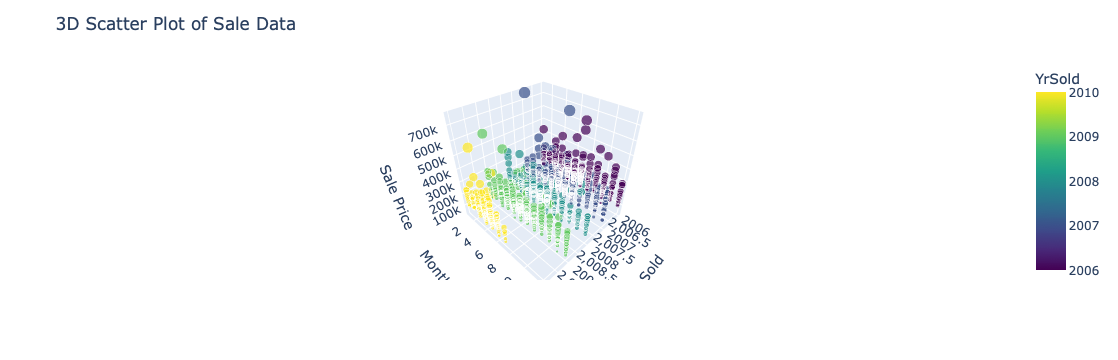

In [40]:
fig = px.scatter_3d(
    data_frame=df,
    x="YrSold",
    y="MoSold",
    z="SalePrice",
    color="YrSold",
    color_continuous_scale='Viridis',
    size="SalePrice",
)
fig.update_layout(
    scene=dict(
        xaxis_title="Year Sold",
        yaxis_title="Month Sold",
        zaxis_title="Sale Price"
    ),
    title="3D Scatter Plot of Sale Data"
)
fig.show()

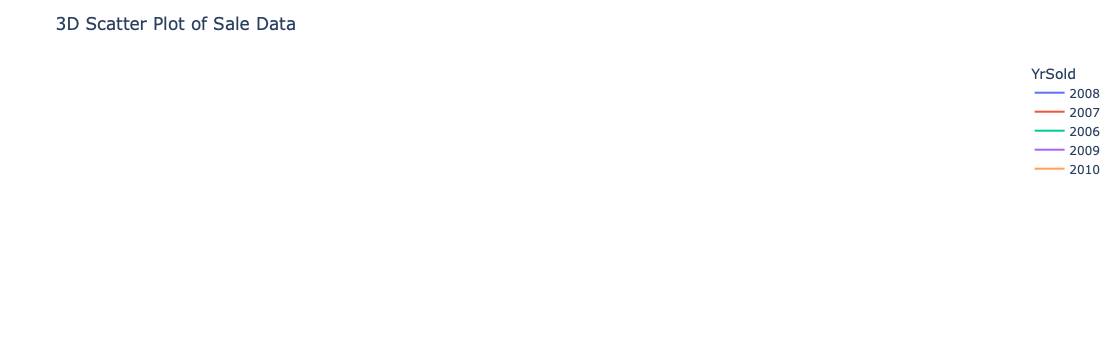

In [41]:
fig = px.line_3d(
    data_frame=df,
    x="YrSold",
    y="MoSold",
    z="SalePrice",
    color="YrSold",
)
fig.update_layout(
    scene=dict(
        xaxis_title="Year Sold",
        yaxis_title="Month Sold",
        zaxis_title="Sale Price"
    ),
    title="3D Scatter Plot of Sale Data"
)
fig.show()

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

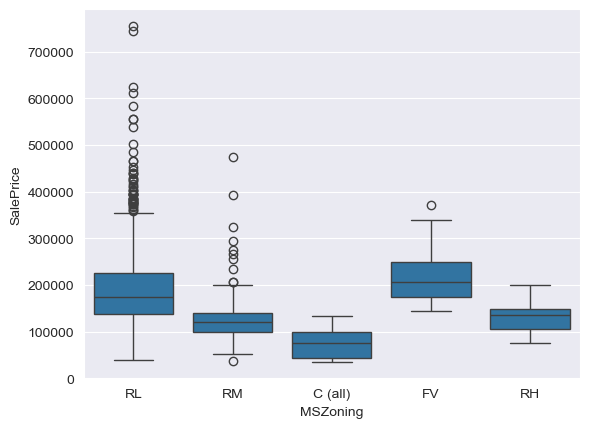

In [43]:
sns.boxplot(data=df, y="SalePrice", x="MSZoning")

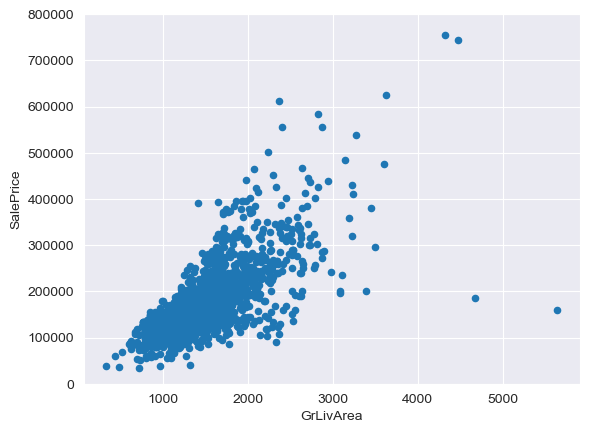

In [45]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

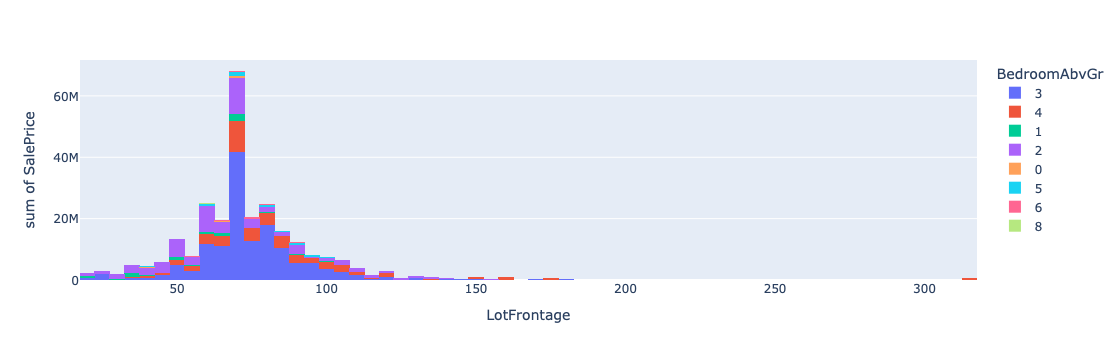

In [49]:
px.histogram(data_frame=df, x="LotFrontage", y="SalePrice", color="BedroomAbvGr")

In [51]:
df.shape

(1460, 59)

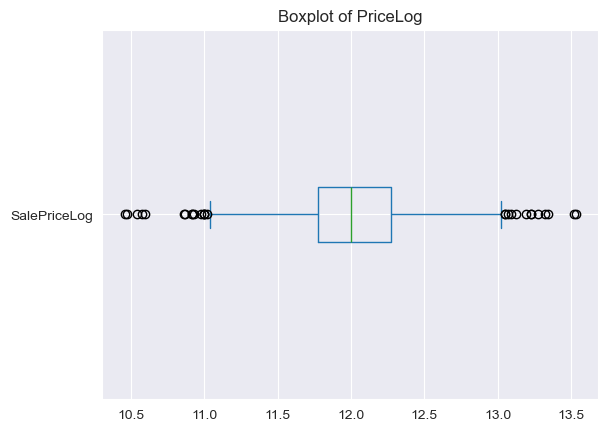

In [196]:
df['SalePriceLog'] = np.log(df['SalePrice'])
df['SalePriceLog'].plot(kind = 'box', vert = False, title = 'Boxplot of PriceLog');

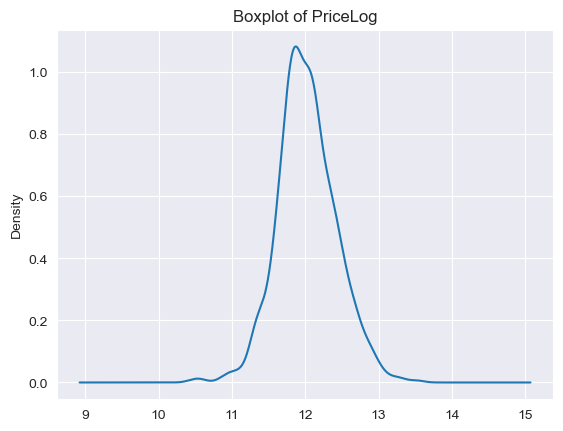

In [198]:
df['SalePriceLog'].plot(kind = 'kde', title = 'Boxplot of PriceLog');

In [200]:
from scipy import stats
df_zscore = df[np.abs(stats.zscore(df['SalePrice'])) < 0.5].copy()
zscore_data_lost = 1 - (df_zscore.shape[0]/df.shape[0])
print("We lost {:.6%} of the data by the z-score method" .format(zscore_data_lost))

We lost 58.424658% of the data by the z-score method


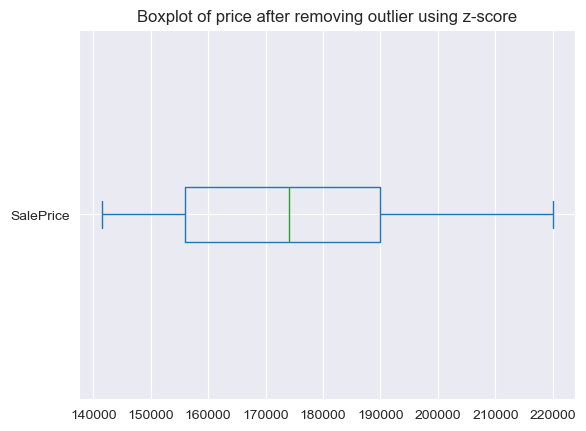

In [202]:
df_zscore['SalePrice'].plot(kind = 'box', vert = False, title = "Boxplot of price after removing outlier using z-score");

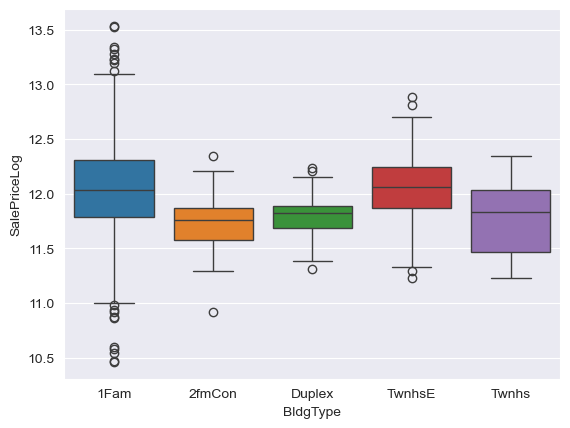

In [204]:
sns.boxplot(x = 'BldgType', y = 'SalePriceLog', data = df, hue = 'BldgType');

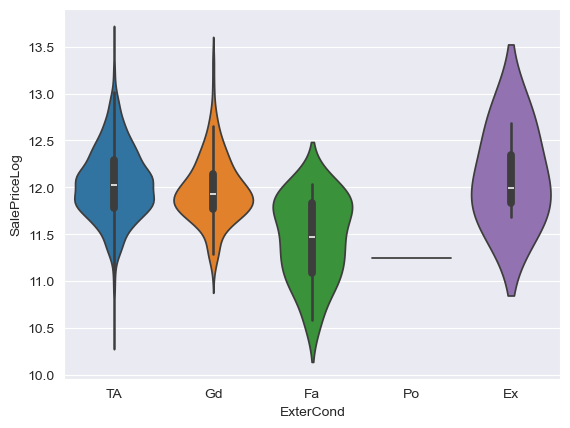

In [206]:
sns.violinplot(x = 'ExterCond', y = 'SalePriceLog', data = df, hue = 'ExterCond');

In [208]:
irq = df['SalePrice'].quantile(.75) - df['SalePrice'].quantile(.25)
lower_bound = df['SalePrice'].quantile(.25) - 1.5 * irq
upper_bound = df['SalePrice'].quantile(.75) + 1.5 * irq
df_irq = df[(df['SalePrice'] > lower_bound) & (df['SalePrice'] > upper_bound)].copy()
irq_data_lost = 1 - (df_irq.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IRQ method" .format(irq_data_lost))

We lost 95.82% of the data by the IRQ method


There is significant data loss if we remove outliers based on Z-score and IRQ and hence outlers remain untouched

In [53]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [55]:
oh = OneHotEncoder(sparse_output=False)
encoded_bldgtype = oh.fit_transform(df[['BldgType']])
encoded_df = pd.DataFrame(encoded_bldgtype, columns=oh.categories_[0])
df = pd.concat([df, encoded_df], axis=1)
df.drop('BldgType', axis=1, inplace = True)

In [57]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1Fam    1460 non-null   float64
 1   2fmCon  1460 non-null   float64
 2   Duplex  1460 non-null   float64
 3   Twnhs   1460 non-null   float64
 4   TwnhsE  1460 non-null   float64
dtypes: float64(5)
memory usage: 57.2 KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtCond

In [61]:
category_features = df.select_dtypes("object").columns
category_features

Index(['MSZoning', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive'],
      dtype='object')

In [63]:
le = LabelEncoder()

for feature in category_features:
    df[feature] = le.fit_transform(df[feature].values.flatten())

In [65]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [67]:
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.25, random_state = 42)
stscaler = StandardScaler()
stscaler.fit(x_train)


StandardScaler()

In [79]:
Cmodels = {
    'LR': LinearRegression(),
    #'LogR': LogisticRegression(solver='lbfgs',max_iter=2500),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

In [81]:
import time
cresults = {}
for model_name, model in Cmodels.items():
    print(f"Training {model_name}...")

    start_time = time.time()
    # Fit the model
    model.fit(x_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    # Predict on the test set
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    # Store the results
    cresults[model_name] = {
        'MAE (Train)': mean_absolute_error(y_train, y_pred_train),
        'MAE (Test)': mean_absolute_error(y_test, y_pred_test),
        'MSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'MSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2 Score (Train)': r2_score(y_train, y_pred_train),
        'R2 Score (Test)': r2_score(y_test, y_pred_test),
        'Runtime': runtime
    }

Training LR...
Training SVM...
Training KNN...
Training DT...
Training RF...
Training XGB...


In [83]:
cresults_df = pd.DataFrame(cresults).T
print("\nModel Comparison:\n")
print(cresults_df)


Model Comparison:

      MAE (Train)    MAE (Test)   MSE (Train)    MSE (Test)  R2 Score (Train)  \
LR   19266.519148  21305.956025  31465.455951  33365.661676          0.836929   
SVM  54985.492895  57211.096859  79668.914243  84767.131881         -0.045408   
KNN  24870.295708  27166.788493  39062.779790  45433.303699          0.748676   
DT       0.000000  23607.898630      0.000000  37126.423985          1.000000   
RF    6814.306493  17195.350493  12262.249169  27817.169725          0.975234   
XGB    609.971590  17517.109664    870.408695  26486.120808          0.999875   

     R2 Score (Test)   Runtime  
LR          0.841082  0.006751  
SVM        -0.025717  0.128404  
KNN         0.705340  0.002886  
DT          0.803239  0.032406  
RF          0.889542  1.804884  
XGB         0.899860  0.274354  


In [85]:
features = columns = x_train.select_dtypes(["int","float"]).columns
features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', '1Fam',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
      dtype='object')

In [87]:
transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('feature',transformer,features)])

In [89]:
preprocessor

ColumnTransformer(transformers=[('feature', StandardScaler(),
                                 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF...
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', '1Fam',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
      dtype='object'))])

In [91]:
pipeline = Pipeline(steps = [("preprocessor",preprocessor),("classifier",LogisticRegression())])

In [93]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('feature', StandardScaler(),
                                                  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'Bsm...
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', '1Fam',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [95]:
pipeline.fit(x_train, y_train)
test_predictions = pipeline.predict(x_test)


In [134]:
Rmodels = {
    'KNN': KNeighborsClassifier(),
    'LogR': LogisticRegression(solver='lbfgs',max_iter=20000),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
}

In [136]:
import time
results = {}
for model_name, model in Rmodels.items():
    print(f"Training {model_name}...")

    start_time = time.time()
    # Fit the model
    model.fit(x_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    # Predict on the test set
    y_pred_test = model.predict(x_test)
    y_pred_prob_test = model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
    
    y_pred_train = model.predict(x_train)
    y_pred_prob_train = model.predict_proba(x_train)[:, 1]  # Probabilities for the positive class

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Store the results
    results[model_name] = {
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Runtime': runtime
    }

Training KNN...
Training LogR...


/Users/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training DT...
Training SVM...


In [138]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)


Model Comparison:

      Test Accuracy  Train Accuracy     Runtime
KNN        0.005479        0.207306    0.003779
LogR       0.002740        0.879452  256.652983
DT         0.005479        1.000000    0.190613
SVM        0.016438        0.023744    5.185356


In [190]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_r2 = (lr.score(x_train, y_train))
print("The value of lr_r2 is {: 2f}".format(lr_r2))

The value of lr_r2 is  0.836929


In [192]:
from sklearn.metrics import root_mean_squared_error
lr_predict = lr.predict(x_test)
lr_rmse = root_mean_squared_error(y_test, lr_predict)
print("The value of lr rmse is {: 2f}".format(lr_rmse))

The value of lr rmse is  33365.661676


In [194]:
sns.lineplot(x=x, y=y_test, label = "actual_values", alpha = 0.5);
sns.lineplot(x=x, y = lr_predict, label = 'lr_predicted_values', alpha = 0.5);
plt.title("Comparison of Real VS Predicted values from Linear Regression")

ValueError: Data must be 1-dimensional, got ndarray of shape (1460, 62) instead